In [5]:
import requests  
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')  
response

<Response [200]>

Мы получили объект ответа, который содержит всю нужную нам информацию. По умолчанию на экран выводится HTTP-код ответа 200. Это означает, что запрос был корректным, и сервер отдал нам нужную информацию.

Код ответа в виде числа можно получить с помощью метода status_code:

In [3]:
response.status_code

200

# Читаем результат

In [7]:
print(response.text)

{
    "Date": "2022-08-27T11:30:00+03:00",
    "PreviousDate": "2022-08-26T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2022\/08\/26\/daily_json.js",
    "Timestamp": "2022-08-26T20:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 41.8063,
            "Previous": 41.57
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 35.3485,
            "Previous": 35.1588
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 71.0653,
            "Previous": 70.6361
     

Сейчас текст хранится просто в строковой переменной. Далее мы можем превратить эту строку в словарь. Сделать это можно с помощью JSON-парсера python, либо воспользовавшись методом json, который уже встроен в объект ответа response.

In [8]:
currencies = response.json()

currencies

{'Date': '2022-08-27T11:30:00+03:00',
 'PreviousDate': '2022-08-26T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2022/08/26/daily_json.js',
 'Timestamp': '2022-08-26T20:00:00+03:00',
 'Valute': {'AUD': {'ID': 'R01010',
   'NumCode': '036',
   'CharCode': 'AUD',
   'Nominal': 1,
   'Name': 'Австралийский доллар',
   'Value': 41.8063,
   'Previous': 41.57},
  'AZN': {'ID': 'R01020A',
   'NumCode': '944',
   'CharCode': 'AZN',
   'Nominal': 1,
   'Name': 'Азербайджанский манат',
   'Value': 35.3485,
   'Previous': 35.1588},
  'GBP': {'ID': 'R01035',
   'NumCode': '826',
   'CharCode': 'GBP',
   'Nominal': 1,
   'Name': 'Фунт стерлингов Соединенного королевства',
   'Value': 71.0653,
   'Previous': 70.6361},
  'AMD': {'ID': 'R01060',
   'NumCode': '051',
   'CharCode': 'AMD',
   'Nominal': 100,
   'Name': 'Армянских драмов',
   'Value': 14.8442,
   'Previous': 14.7602},
  'BYN': {'ID': 'R01090B',
   'NumCode': '933',
   'CharCode': 'BYN',
   'Nominal': 1,
   'Name': 'Бел

In [10]:
currencies['Valute']['BYN']

{'ID': 'R01090B',
 'NumCode': '933',
 'CharCode': 'BYN',
 'Nominal': 1,
 'Name': 'Белорусский рубль',
 'Value': 23.5888,
 'Previous': 23.4622}

### Задание 1 CZK

Повторите запросы, описанные в этой части, на своём компьютере. Что выведет на экран следующий код?

In [11]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон


# Оформляем функцию

### Задание 1 Названия валют

Напишите функцию currency_name, которая по ID валюты возвращает ее название на русском языке.

currency_name('R01700J')
#=> 'Турецких лир' 

In [35]:
def currency_name(id):
    url = 'https://www.cbr-xml-daily.ru/daily_json.js'
    response = requests.get(url).json()
    for i in response['Valute']:
        if response['Valute'][i]['ID'] == id:
            return response['Valute'][i]['Name']

In [36]:
currency_name('R01700J')

'Турецких лир'

# HTML-страницы

In [38]:
response = requests.get('https://nplus1.ru/news/2019/06/04/slothbot')

print(response.text)

<!doctype html>
<html class="old-town-road no-js bg-fixed _no-bg" style="background-image:url(https://nplus1.ru/images/2019/06/04/b32b62189fb87cce895e229e1d6d27b4.jpeg)" lang="">
<head>
    
    <meta charset="utf-8">
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
        <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">
                <meta name='wmail-verification' content='7991d7eb02d759f05b9050e111a7e3eb' />

    <link rel="canonical" href="https://nplus1.ru/news/2019/06/04/slothbot" />

    <link rel="icon" href="/i/favicon-bw.png" />


        <title>Робота-ленивца научили лазать по паутине из тросов</title>

    	    <meta itemprop="datePublished" content="2019-06-04"/>
	
	    <meta name="mediator_author" content="Григорий Копиев"/> 
	
        <!-- amp page -->
    <link rel="amphtml" href="https://nplus1.ru/news/2019

# Библиотека BeautifulSoup

In [40]:
from bs4 import BeautifulSoup

In [45]:
url = 'https://nplus1.ru/news/2019/06/04/slothbot'   
response = requests.get(url)    

response

<Response [200]>

In [46]:
# Теперь создадим объект BeautifulSoup, указывая html парсер    
page = BeautifulSoup(response.text, 'html.parser')

page.title

<title>Робота-ленивца научили лазать по паутине из тросов</title>

In [48]:
page.title.text

'Робота-ленивца научили лазать по паутине из тросов'

Читаем заголовок

In [50]:
page.find('h1').text

'Робота-ленивца научили лазать по паутине из тросов'

In [54]:
page.find('time').text

'\n18:27\n04 Июнь 2019\n'

In [53]:
print(page.find('time').text)


18:27
04 Июнь 2019



Напишем функцию wiki_header, которая по адресу страницы возвращает заголовок для статей на википедии

wiki_header('https://en.wikipedia.org/wiki/Operating_system')

=> 'Operating system'

In [57]:
def wiki_header(url):
    response = requests.get(url)
    page = BeautifulSoup(response.text, 'html.parser')
    return page.find('h1').text

In [58]:
wiki_header('https://en.wikipedia.org/wiki/Operating_system')

'Operating system'

Tэг элемента неуникальный. Пусть мы хотим получить сам текст статьи. Мы видим, что он находится в тэге div

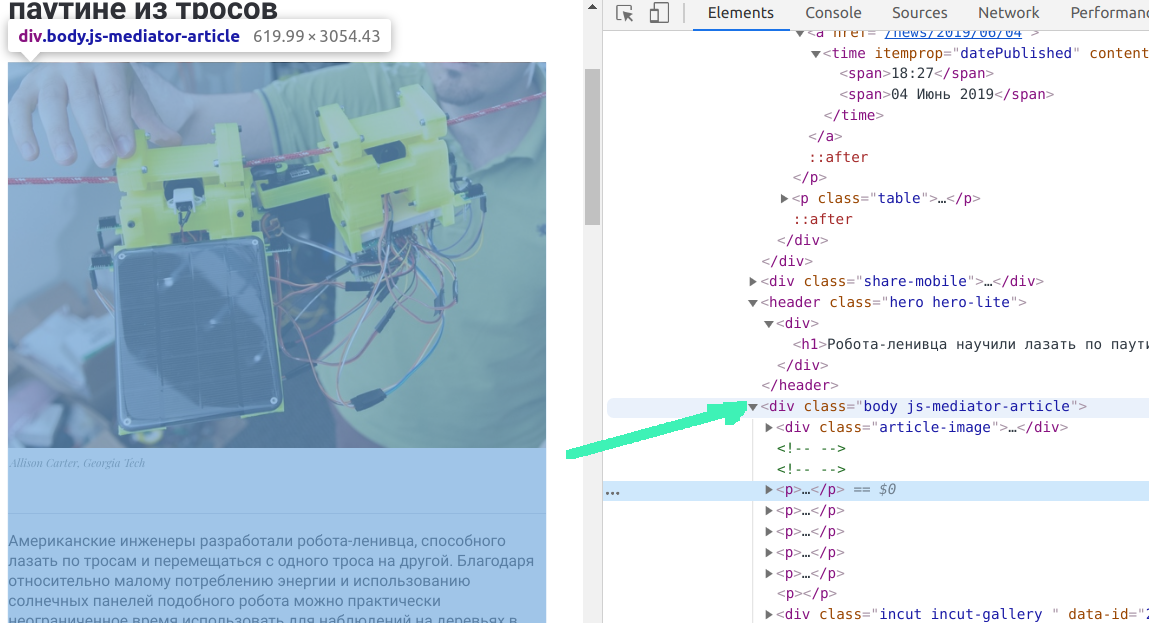

Тэги div очень распространённые, их много на странице. Если мы просто используем find, то получим первый попавшийся, но это не то, что нам надо.

In [66]:
response = requests.get('https://nplus1.ru/news/2019/06/04/slothbot')

page = BeautifulSoup(response.text,'html.parser')

page.find('div').text

''

Тут мы можем заметить, что у искомого текста есть свой класс body js-mediator-article. Воспользуемся этим:  в метод find можно передать аргумент class_. Стоит обратить внимание на то, что поиск идет по вхождению (а не полному совпадению = равенству) текста в реальный атрибут.

In [69]:
print(page.find('div', class_='body').text)  







Allison Carter, Georgia Tech





Американские инженеры разработали робота-ленивца, способного лазать по тросам и перемещаться с одного троса на другой. Благодаря относительно малому потреблению энергии и использованию солнечных панелей подобного робота можно практически неограниченное время использовать для наблюдений на деревьях в лесу, рассказывают авторы статьи, представленной на конференции ICRA 2019.
Создание роботов, способных лазать по тросам — важная технологическая задача, наработки из которой потенциально применимы во многих областях. К примеру, в 2016 году в России создали робота для проверки высоковольтных линий электропередачи. Дрон спускает такого робота на грозозащитный трос, после чего тот самостоятельно перемещается вдоль основных проводов и осматривает их. Кроме того, потенциально таких роботов можно применять для исследований в густых лесах, в которых ветки соседних деревьев соприкасаются.
Инженеры из Технологического института Джорджии под руководством Магнус

### Собираем все ссылки на странице

Рассмотрим случай, когда нам нужно сразу много элементов. Пусть мы хотим получить название всех ссылок на странице в википедии про языки программирования.

Для ссылок существует тэг <a></a>.  Давайте попробуем использовать find  

In [79]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages'  
  
response = requests.get(url)  
page = BeautifulSoup(response.text, 'html.parser')  
page.find('a') 

<a id="top"></a>

Что-то пошло не так, и мы получили только одну ссылку, хотя на странице их явно больше. Это происходит, потому что метод find возвращает только первый подходящий элемент. Если нам надо их больше, нужно воспользоваться методом find_all

In [80]:
links = page.find_all('a')
print(len(links))

940


In [83]:
print([link.text for link in links[500:510]])

['Open Programming Language', 'OpenCL', 'OpenEdge Advanced Business Language', 'OpenVera', 'OpenQASM', 'OPS5', 'OptimJ', 'Orc', 'ORCA/Modula-2', 'Oriel']


In [85]:
# Получаем все элементы с тегом 'div' и классом 'div-col'  
all_blocks = page.find_all('div', class_='div-col')  
  
# Выбираем первый по счету блок  
first_block = all_blocks[0]  
# Берём оттуда ссылки (ограничимся первыми десятью)
links = first_block.find_all('a')
print([link.text for link in links[:10]])

['A.NET (A#/A sharp)', 'A-0 System', 'A+ (A plus)', 'A++', 'ABAP', 'ABC', 'ABC ALGOL', 'ACC', 'Accent (Rational Synergy)', 'Ace DASL (Distributed Application Specification Language)']


Получить данные с сайта ЦБ о драгметаллах мы можем получить несколькими способами, например:

In [6]:
# использовать pandas

import pandas as pd

pd.read_html('https://www.cbr.ru/key-indicators/')[2] 

,0,1,2
0,рублей за грамм,27.10.2022,28.10.2022
1,Золото Au,"3 276,93","3 288,05"
2,Серебро Ag,3729,3865
3,Платина Pt,"1 799,17","1 844,51"
4,Палладий Pd,"3 732,65","3 876,42"


In [7]:
# или использовать BeautifulSoup

from bs4 import BeautifulSoup

url = 'https://www.cbr.ru/key-indicators/'
soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, 'html.parser')  

all_blocks = soup.find_all('div', class_='key-indicator_content offset-md-2')

data = all_blocks[2].find('table')

pd.read_html(str(data))

[                 0           1           2
 0  рублей за грамм  27.10.2022  28.10.2022
 1        Золото Au    3 276,93    3 288,05
 2       Серебро Ag        3729        3865
 3       Платина Pt    1 799,17    1 844,51
 4      Палладий Pd    3 732,65    3 876,42]

Напишем код, который получает данные из таблицы рейтинга банков с https://www.banki.ru/banks/ratings/

In [11]:
url = 'https://www.banki.ru/banks/ratings/'
soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, 'html.parser')  
all_blocks = soup.find_all('div', class_ = "layout-column-full")
data = all_blocks[2].find('table')
pd.read_html(str(data))[0]

место                  название банка лицензия №, Регион  \
     место                  название банка лицензия №, Регион   
0        1            СберБанк лицензия № 1481, Москва и обл.   
1        2        ВТБ лицензия № 1000, Санкт-Петербург и обл.   
2        3          Газпромбанк лицензия № 354, Москва и обл.   
3        4  Национальный Клиринговый Центр лицензия № 3466...   
4        5          Альфа-Банк лицензия № 1326, Москва и обл.   
5        6      Россельхозбанк лицензия № 3349, Москва и обл.   
6        7  Московский Кредитный Банк лицензия № 1978, Мос...   
7        8       Банк Открытие лицензия № 2209, Москва и обл.   
8        9        Совкомбанк лицензия № 963, Костромская обл.   
9       10     Райффайзен Банк лицензия № 3292, Москва и обл.   
10      11             Росбанк лицензия № 2272, Москва и обл.   
11   12 +1       Тинькофф Банк лицензия № 2673, Москва и обл.   
12   13 +1         ЮниКредит Банк лицензия № 1, Москва и обл.   
13   14 −2      Россия лицензия № 328, Санкт-Петербург и обл.   
14      15  Всероссийский Банк Развития Регионов лицензия ...   
15      16               Траст лицензия № 3279, Москва и обл.   
16      17         Банк ДОМ.РФ лицензия № 2312, Москва и обл.   
17      18  Банк «Санкт-Петербург» лицензия № 436, Санкт-П...   
18   19 +1            Ситибанк лицензия № 2557, Москва и обл.   
19   20 −1            СМП Банк лицензия № 3368, Москва и обл.   
20      21         Новикомбанк лицензия № 2546, Москва и обл.   
21      22                 Ак Барс лицензия № 2590, Татарстан   
22      23             БМ-Банк лицензия № 2748, Москва и обл.   
23      24        Банк Уралсиб лицензия № 2275, Москва и обл.   
24      25           Почта Банк лицензия № 650, Москва и обл.   
25      26  Московский Областной Банк лицензия № 1751, Мос...   
26      27            Пересвет лицензия № 2110, Москва и обл.   
27   28 +2  Уральский Банк Реконструкции и Развития лиценз...   
28   29 +4  Национальный Расчетный Депозитарий лицензия № ...   
29   30 −1  Московский Индустриальный Банк лицензия № 912,...   
30   31 −3                  РНКБ лицензия № 1354, Симферополь   
31      32            МТС Банк лицензия № 2268, Москва и обл.   
32   33 −2     Хоум Кредит Банк лицензия № 316, Москва и обл.   
33      34    Русский Стандарт лицензия № 2289, Москва и обл.   
34      35          Банк Зенит лицензия № 3255, Москва и обл.   
35      36        Абсолют Банк лицензия № 2306, Москва и обл.   
36   37 +1    Транскапиталбанк лицензия № 2210, Москва и обл.   
37   38 −1        Росэксимбанк лицензия № 2790, Москва и обл.   
38      39      Инвестторгбанк лицензия № 2763, Москва и обл.   
39      40        Сетелем Банк лицензия № 2168, Москва и обл.   
40   41 +1           Экспобанк лицензия № 2998, Москва и обл.   
41   42 +1            ОТП Банк лицензия № 2766, Москва и обл.   
42   43 −2        ВУЗ-Банк лицензия № 1557, Свердловская обл.   
43      44    Ренессанс Кредит лицензия № 3354, Москва и обл.   
44   45 +2  Таврический Банк лицензия № 2304, Санкт-Петерб...   
45   46 −1            РГС Банк лицензия № 3073, Москва и обл.   
46   47 −1    Металлинвестбанк лицензия № 2440, Москва и обл.   
47      48            Авангард лицензия № 2879, Москва и обл.   
48   49 +2  Азиатско-Тихоокеанский Банк лицензия № 1810, А...   
49  50 +12            ИНГ Банк лицензия № 2495, Москва и обл.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                